# Linear Regression

This morning's warmup will more a codealong.

Since we're nearing the end of mod project, let's make sure we have the code down for fitting a linear regression model!

Below we import life expectancy data for 193 countries from 2000-2015.

In [62]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/joelsewhere/a61e90c0d88cddb052975d65835bc339/raw/20743a0ea41fae58dbee2f166e5d0af56a5f4242/life_expectancy.csv')

For this warmup, let's:
- Limit the dataset to the year 2015
- Remove all columns containing strings
- Lower the column names and replace spaces with underscores

In [63]:
df = df[df.Year == 2015]
df = df.select_dtypes(exclude=['object'])
df.columns = [x.lower().strip().replace(' ', '_') for x in df.columns]

Great, let's make sure we don't have any null values!

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 2922
Data columns (total 20 columns):
year                               183 non-null int64
life_expectancy                    183 non-null float64
adult_mortality                    183 non-null float64
infant_deaths                      183 non-null int64
alcohol                            6 non-null float64
percentage_expenditure             183 non-null float64
hepatitis_b                        174 non-null float64
measles                            183 non-null int64
bmi                                181 non-null float64
under-five_deaths                  183 non-null int64
polio                              183 non-null float64
total_expenditure                  2 non-null float64
diphtheria                         183 non-null float64
hiv/aids                           183 non-null float64
gdp                                154 non-null float64
population                         142 non-null float64
thinness__

# $Yikes$

Ok, let's first drop the ```alcohol``` and ```total_expenditure``` columns.

Once we've done that we can drop any other rows that have null values. 

We will also drop our ```year``` column for now.

In [65]:
df.drop(['alcohol', 'total_expenditure', 'year'], axis = 1, inplace = True)
df.dropna(inplace=True)

Next we need to isolate out X and y data.

For this dataset, the column ```life_expectancy``` is our target column *(our y column)*

In [66]:
X = df.drop('life_expectancy', axis=1)
y = df['life_expectancy']

Ok, now in the cell below import ```statsmodels.api as sm```.

In [67]:
import statsmodels.api as sm

And then we fit out model!

In [100]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              999.2
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                   1.68e-114
Time:                        01:21:40   Log-Likelihood:                         -417.18
No. Observations:                 130   AIC:                                      866.4
Df Residuals:                     114   BIC:                                      912.2
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
adult_mortality                     0.0128      0.008      1.643      0.103      -0.003       0.028
infant_deaths                      -0.0887      0.076     -1.162      0.248      -0.240       0.062
percentage_expenditure              0.0069      0.017      0.394      0.694      -0.028       0.041
hepatitis_b                         0.0489      0.054      0.912      0.363      -0.057       0.155
measles                           4.99e-05      0.000      0.369      0.713      -0.000       0.000
bmi                                 0.0029      0.037      0.080      0.936      -0.070       0.076
under-five_deaths                   0.0568      0.055      1.036      0.302      -0.052       0.165
polio                               0.0411      0.030      1.371      0.173      -0.018       0.100
diphtheria                          0.0151      0.062      0.243      0.808      -0.108       0.138
hiv/aids                            0.3207      0.524      0.612      0.541      -0.717       1.358
gdp                                -0.0002    6.7e-05     -2.871      0.005      -0.000   -5.97e-05
population                       4.223e-09   2.27e-08      0.186      0.853   -4.07e-08    4.92e-08
thinness__1-19_years                0.3341      0.553      0.604      0.547      -0.762       1.430
thinness_5-9_years                  0.4688      0.540      0.868      0.387      -0.601       1.539
income_composition_of_resources    78.5533     10.841      7.246      0.000      57.076     100.030
schooling                           0.2954      0.566      0.522      0.602      -0.825       1.416
==============================================================================
Omnibus:                        2.667   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.468
Skew:                           0.337   Prob(JB):                        0.291
Kurtosis:                       2.985   Cond. No.                     6.24e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**How well is our model explaining the variance of our data?**

**Before we go, let's fit an sklearn model as well.**

In [75]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

First we create a model object.

In [74]:
lr = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Then we fit the model object on our X, and y data.

In [ ]:
lr.fit(X, y)

Next we use the model to predict values for our X data.

In [101]:
y_hat = lr.predict(X)

Then we compare our predictions to the actual y values

In [103]:
metrics.r2_score(y, y_hat)

0.9008630576092219

Now let's plot our coefficients!

In [110]:
def plot_coefficients(column_names, coefficients):
    plt.figure(figsize=(15,8))
    zipped = list(zip(column_names,coefficients))
    zipped = sorted(zipped, key= lambda x: x[1])
    
    xaxis = [x[0] for x in zipped]
    yaxis = [x[1] for x in zipped]
    
    plt.bar(xaxis, yaxis)
    plt.xticks(rotation=60)
    plt.title('Coefficients')

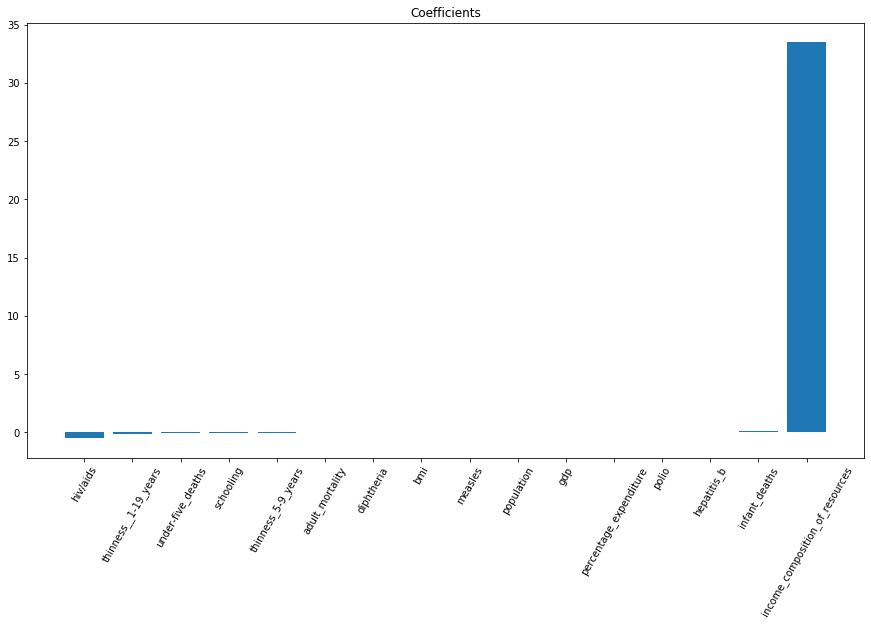

In [111]:
plot_coefficients(X.columns, lr.coef_)

There are some major differences between the coefficients. It might be beneficial to scale our data using Sklearn's Standard Scaler.

In [115]:
from sklearn import preprocessing

In [119]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns = X.columns)

To speed things up, let's compile out modeling code into functions

In [131]:
def OLS(X, y):
    return sm.OLS(y, X).fit()

def linear_regression(X,y):
    lr = LinearRegression()
    lr.fit(X, y)
    y_hat = lr.predict(X)
    r_squared = metrics.r2_score(y, y_hat)
    print("R^2:", r_squared)
    plot_coefficients(X.columns, lr.coef_)
    return lr

In [129]:
OLS(X_scaled, y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              999.2
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                   1.68e-114
Time:                        01:35:01   Log-Likelihood:                         -417.18
No. Observations:                 130   AIC:                                      866.4
Df Residuals:                     114   BIC:                                      912.2
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
adult_mortality                     0.0128      0.008      1.643      0.103      -0.003       0.028
infant_deaths                      -0.0887      0.076     -1.162      0.248      -0.240       0.062
percentage_expenditure              0.0069      0.017      0.394      0.694      -0.028       0.041
hepatitis_b                         0.0489      0.054      0.912      0.363      -0.057       0.155
measles                           4.99e-05      0.000      0.369      0.713      -0.000       0.000
bmi                                 0.0029      0.037      0.080      0.936      -0.070       0.076
under-five_deaths                   0.0568      0.055      1.036      0.302      -0.052       0.165
polio                               0.0411      0.030      1.371      0.173      -0.018       0.100
diphtheria                          0.0151      0.062      0.243      0.808      -0.108       0.138
hiv/aids                            0.3207      0.524      0.612      0.541      -0.717       1.358
gdp                                -0.0002    6.7e-05     -2.871      0.005      -0.000   -5.97e-05
population                       4.223e-09   2.27e-08      0.186      0.853   -4.07e-08    4.92e-08
thinness__1-19_years                0.3341      0.553      0.604      0.547      -0.762       1.430
thinness_5-9_years                  0.4688      0.540      0.868      0.387      -0.601       1.539
income_composition_of_resources    78.5533     10.841      7.246      0.000      57.076     100.030
schooling                           0.2954      0.566      0.522      0.602      -0.825       1.416
==============================================================================
Omnibus:                        2.667   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.468
Skew:                           0.337   Prob(JB):                        0.291
Kurtosis:                       2.985   Cond. No.                     6.24e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2: 0.9008630576092219


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

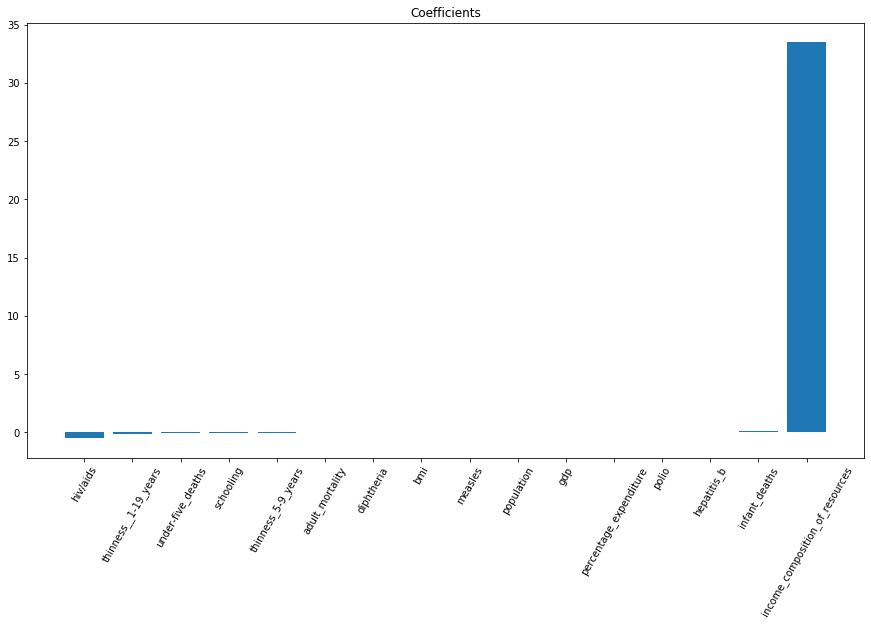

In [132]:
linear_regression(X_scaled, y)

No change! Let's take a look at the relationship between income_composition_of_resources and our target.

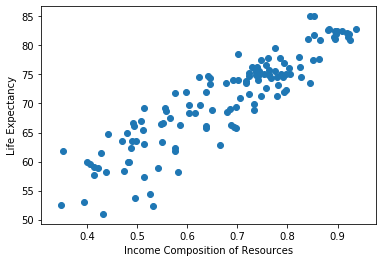

In [136]:
plt.scatter(df.income_composition_of_resources, df.life_expectancy)
plt.ylabel('Life Expectancy')
plt.xlabel('Income Composition of Resources');

Let's see what happens to our coefficients if we drop this column.

In [138]:
X_scaled.drop('income_composition_of_resources', axis = 1, inplace = True)

R^2: 0.8609382489399316


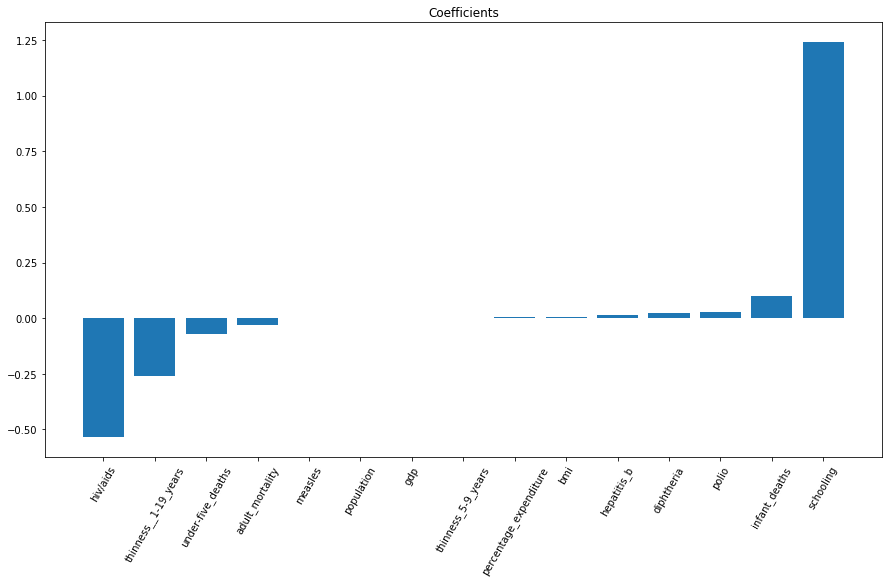

In [140]:
linear_regression(X_scaled, y);

In [141]:
OLS(X_scaled, y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              733.7
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                   1.42e-106
Time:                        01:40:17   Log-Likelihood:                         -441.80
No. Observations:                 130   AIC:                                      913.6
Df Residuals:                     115   BIC:                                      956.6
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
adult_mortality            0.0007      0.009      0.075      0.940      -0.017       0.019
infant_deaths             -0.0423      0.091     -0.462      0.645      -0.224       0.139
percentage_expenditure     0.0046      0.021      0.219      0.827      -0.037       0.046
hepatitis_b               -0.0283      0.063     -0.448      0.655      -0.153       0.097
measles                -5.738e-05      0.000     -0.354      0.724      -0.000       0.000
bmi                        0.0503      0.043      1.158      0.249      -0.036       0.137
under-five_deaths          0.0306      0.066      0.466      0.642      -0.100       0.161
polio                      0.0921      0.035      2.631      0.010       0.023       0.162
diphtheria                 0.1120      0.073      1.531      0.129      -0.033       0.257
hiv/aids                   0.4156      0.630      0.660      0.511      -0.832       1.663
gdp                       -0.0002   8.06e-05     -2.617      0.010      -0.000   -5.13e-05
population              1.428e-08   2.72e-08      0.524      0.601   -3.97e-08    6.83e-08
thinness__1-19_years       0.0888      0.664      0.134      0.894      -1.227       1.405
thinness_5-9_years         0.7005      0.649      1.080      0.283      -0.585       1.986
schooling                  3.9600      0.304     13.006      0.000       3.357       4.563
==============================================================================
Omnibus:                        3.546   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.552
Skew:                           0.395   Prob(JB):                        0.169
Kurtosis:                       2.821   Cond. No.                     4.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""